<a href="https://colab.research.google.com/github/RAMADUGUAJAY/dl/blob/main/dl_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/5
157/157 [==============================] - 117s 709ms/step - loss: 0.6640 - accuracy: 0.5823 - val_loss: 0.7174 - val_accuracy: 0.5026
Epoch 2/5
157/157 [==============================] - 98s 625ms/step - loss: 0.6232 - accuracy: 0.6511 - val_loss: 0.6071 - val_accuracy: 0.6644
Epoch 3/5
157/157 [==============================] - 93s 594ms/step - loss: 0.5364 - accuracy: 0.7244 - val_loss: 0.6361 - val_accuracy: 0.6200
Epoch 4/5
157/157 [==============================] - 89s 566ms/step - loss: 0.4686 - accuracy: 0.7786 - val_loss: 0.7241 - val_accuracy: 0.7208
Epoch 5/5
196/196 [==============================] - 9s 46ms/step - loss: 0.6408 - accuracy: 0.6228
Epoch 1/5
157/157 [==============================] - 34s 198ms/step - loss: 0.5312 - accuracy: 0.7199 - val_loss: 0.3495 - val_accuracy: 0.8468
Epoch 2/5
157/157 [==============================] - 19s 120ms/step - loss: 0.2964 - accuracy: 0.8776 - val_loss: 

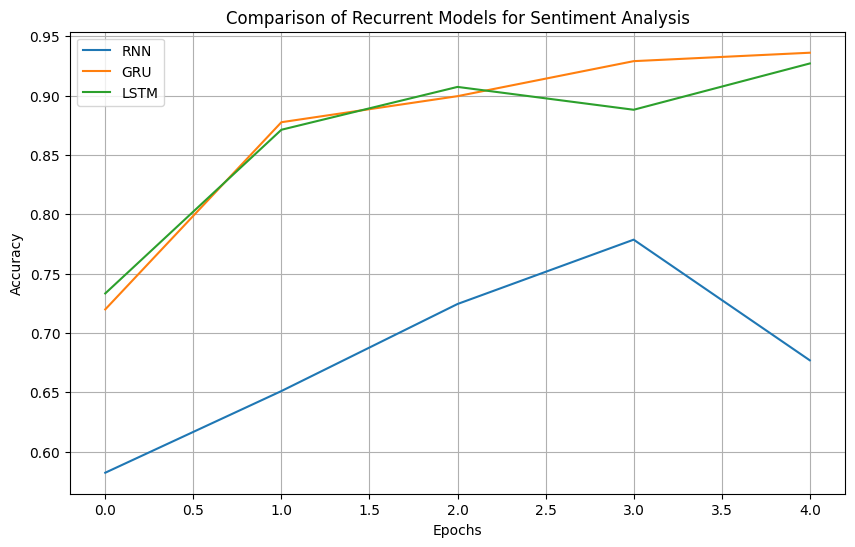

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence


max_words = 5000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

accuracies = []

model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]


batch_size = 128
epochs = 5


histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()

